

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; Нам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят).

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [2]:
### Импортируем библиотеки
import pandas as pd
import numpy as np
### Машинное обучение
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split 
### Визуализация
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
### Загрузим датасет и выведем первые 5 строк для визуального анализа
telecom_df = pd.read_csv("telecom_users.csv")
telecom_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
### Тип данных в столбцах 
telecom_df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
### Размер датасета
telecom_df.shape

(5986, 22)

In [6]:
### Kоличество пропущенных значений в каждой из колонок
telecom_df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
### Проверим количество уникальных значений в столбце 'Unnamed: 0'
telecom_df['Unnamed: 0'].nunique()

5986

In [8]:
### С помощью метода Describe выведем общую информацию по всем числовым столбцам 
telecom_df.describe(include =['float', 'int'])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [9]:
### С помощью метода Describe выведем общую информацию по всем столбцам типа object
telecom_df.describe(include ='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,4250-FDVOU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399



#### Первичные данные

Данный датасет содержит сведения о 22 параметрах для 5986 пользователей. 3 столбца имеют класс (int), один столбец класс (float), остальные столбцы имеют класс (object). Датасет не содержит пропущенных значений. Так же имеется столбец Unnamed: 0, который очевидно является внутренней нумерацией абонентов, используемой в таблице.

* Параметры Partner, Dependents, PhoneService, PaperlessBilling и Churn имеют 2 уникальных значения Yes и No;
* Параметры MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies имеют 3 уникальных параметра, 2 из которых также Yes и No; 
* Параметр InternetService и Contract имеют по 3 уникальных значения, параметр PaymentMethod 4;


Для дальнейшей работы решим следующие задачи:

* Стобец "TotalCharges" имеет тип "object", хотя содержит численные значения. Необходимо привести его к типу "float";
* Количество уникальных значений для каждого столбца привести их к численным значениям для дальнейшей работы;
* Определить важность каждого из параметров;


In [10]:
### Приведем "TotalCharges" к типу "int" и проверим наличие пропущенных значений

telecom_df['TotalCharges'] = pd.to_numeric(telecom_df['TotalCharges'], errors='coerce')
telecom_df['TotalCharges'].isna().value_counts()

False    5976
True       10
Name: TotalCharges, dtype: int64


Из полученных результатов следует, что для 10 абонентов нет данных по оплате. Для принятия решения об удалении данных строк, взгляним на них.



In [11]:
### Выведем строки с нулевыми значениями
telecom_df[pd.isnull(telecom_df['TotalCharges'])]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


Мы видим, что все абоненты являются новыми пользователями (tenure = 0), поэтому нулевые значения в столбце месячной оплаты вполне объяснимы. Для дальнейшей работы заменим их на 0.



In [12]:
### Замена NaN на 0
telecom_df.fillna(0, inplace=True)

Перейдем к преобразованиям нашего датафрейма для дальнейшей работы.

Столбцы "Unnamed: 0" и "customerID" не несут в себе смысловой нагрузки для построения моделей прогнозирования, поэтому удалим их.

In [13]:
### Удалим столбец "Unnamed: 0" и "customerID"
telecom_df.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)

Для дальнейшего преобразования примем:
   * Yes = 1
   * No = 0
   * Male = 1
   * Female = 0

In [14]:
### Замена значений male и female
telecom_df = telecom_df.replace('Male', 1)
telecom_df = telecom_df.replace('Female', 0)

### Замена значений Yes и No
telecom_df = telecom_df.replace('Yes', 1)
telecom_df = telecom_df.replace('No', 0)

In [15]:
### Визуализируем датасет
telecom_df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,0,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,1,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.50,0
4,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.50,0
5,0,0,1,0,70,0,No phone service,DSL,1,0,1,1,0,1,Two year,1,Bank transfer (automatic),49.85,3370.20,0
6,0,0,0,0,33,1,1,Fiber optic,1,0,0,0,0,1,Month-to-month,1,Electronic check,90.65,2989.60,0
7,0,0,0,0,1,0,No phone service,DSL,0,0,0,0,0,0,Month-to-month,1,Mailed check,24.90,24.90,0
8,1,0,0,0,39,0,No phone service,DSL,0,0,1,1,0,0,One year,0,Mailed check,35.55,1309.15,0
9,1,1,0,0,55,1,1,Fiber optic,1,1,1,1,1,1,Month-to-month,1,Electronic check,116.50,6382.55,0


Для столбцов (OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies) очевидно наличие одного и того же параметра 'No internet service' при отсутсвии подписки на Интернет у абонента.
Аналогично для столбца MultipleLines. Так как данные о наличии подписки на сервисы интернета и телефонии могут быть важны для нашего прогнозирования, заменим данные значения на 0.

In [16]:
### Замена значений 'No internet service'
telecom_df = telecom_df.replace('No internet service', 0)
telecom_df = telecom_df.replace('No phone service', 0)

Примем следующие числовые значения:

* InternetService
    * DSL = 1
    * Fiber optic = 2
    
* Contract
    * Month-to-month = 0
    * One year = 1
    * Two year = 2
    
* PaymentMethod
    * Credit card (automatic) = 0
    * Bank transfer (automatic) = 1
    * Electronic check = 2
    * Mailed check = 3
    
    

In [17]:
telecom_df = telecom_df.replace('DSL', 1)
telecom_df = telecom_df.replace('Fiber optic', 2)

telecom_df = telecom_df.replace('Month-to-month', 0)
telecom_df = telecom_df.replace('One year', 1)
telecom_df = telecom_df.replace('Two year', 2)

telecom_df = telecom_df.replace('Credit card (automatic)', 0)
telecom_df = telecom_df.replace('Bank transfer (automatic)', 1)
telecom_df = telecom_df.replace('Electronic check', 2)
telecom_df = telecom_df.replace('Mailed check', 3)

telecom_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2. Исследование зависимостей и формулирование гипотез

### В начале работы по исследованию предоставленного датасета, сформируем гипотезы, которые нам предстоит подтвердить или опровергнуть 

* Из имеющихся данных мы можем выделить несколько больших групп, в которых признаки тем или иным образом связаны между собой. Первый анализ проведем в данных группах:

1) Группа c персональными данными включает в себя информацию о поле, пенсионном возрасте, браке и иждивенцах. Данная группа является бинарной, то есть данные в ней отвечают на вопросы "да" или "нет". В ней предлагается найти корреляцию между оттоком абонентов и признаками.

2) Вторая группа связана с оплатой. Здесь интересно исследовать отток абонентов в зависимости от способов оплаты, увеличения ежемесячного платежа, а так же общего платежа за все время.

3) Третья группа связана с подключенными сервисами: мобильной и интернет связью, а так же дополнительными опциями, связанными с этим.

4) Отдельно стоит отметить временную группу. Столбец с данными о продолжительности пользования услугами может дать нам возможность понять, на каком этапе пользователи отказываются от сервиса. Столбец с данными о периоде, на который заключен контракт, позволит нам определить, какой срок контракта удерживает больше всего пользователей.  

* В наших данных столбец Churn отвечает за информацию об оттоке пользователей. Значение 1 в нем означает, что пользователь отказался от услуг. Относительно данного столбца и будем проводить исследования гипотез.

### 1) Анализ зависимостей персональных данных

In [18]:
### Количество ушедших абонентов (группировка по полу)
count_gender = telecom_df[['gender', 'Churn']].groupby(['gender']
                                         ).sum().sort_values(by='Churn')


print(telecom_df['gender'].value_counts(normalize=True))
count_gender

1    0.509522
0    0.490478
Name: gender, dtype: float64


,Churn
gender,
0,791
1,796


В датафрейме количество абонентов мужского пола 51%, женского 49%. Туже самую зависимость мы видим по количеству ушедших клиентов: 796 абонентов м/п и 791 ж/п. То есть на данном этапе мы можем сделать вывод, что отток напрямую не коррелирует с полом клиента.

Проанализируем остальные "семейные переменные" отдельно и в связке с полом абонента.

In [19]:
### Количество ушедших абонентов (группировка по пенсионному возрасту)
print(telecom_df[['SeniorCitizen']].value_counts(normalize=True))
count_senior = telecom_df[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen']
                                         ).sum().sort_values(by='Churn')
count_senior

SeniorCitizen
0                0.838623
1                0.161377
dtype: float64


,Churn
SeniorCitizen,
1,402
0,1185


Отток пенсионеров составляет 25.3 % относительно общего количества ушедших пользователей, что почти на 9% больше, чем общее количество пенсионеров среди исследуемых нами данных - 16,14%. Отсюда можно сделать вывод, что люди пенсионного возраста чаще отказываются от услуг компании. Эти данные следует учитывать в наших моделях прогнозирования.

In [20]:
### Количество ушедших абонентов (группировка по полу и пенсионному возрасту)
count_senior = telecom_df[['gender', 'SeniorCitizen', 'Churn']].groupby(['gender', 'SeniorCitizen']
                                         ).sum().sort_values(by='Churn')

count_senior

Churn
gender SeniorCitizen       
1      1                196
0      1                206
       0                585
1      0                600

Из полученных данных видно, что различие оттока пенсионеров в отличии от их пола не является существенным

In [21]:
count = telecom_df[['Partner', 'Churn']].groupby(['Partner']
                                         ).sum().sort_values(by='Churn')
print(telecom_df['Partner'].value_counts(normalize=True))
count

0    0.514868
1    0.485132
Name: Partner, dtype: float64


,Churn
Partner,
1,576
0,1011


Всего в браке состоят 48.5% абонентов, при отток по этому признаку составил 36,3%  

In [22]:
### Количество ушедших абонентов (группировка по полу и семейному положению)
count = telecom_df[['gender', 'Partner', 'Churn']].groupby(['gender', 'Partner']
                                         ).sum().sort_values(by='Churn')

count

Churn
gender Partner       
0      1          276
1      1          300
       0          496
0      0          515

Различие оттока абонентов в браке в зависимости от их пола не является существенным

In [23]:
count = telecom_df[['Dependents', 'Churn']].groupby(['Dependents']
                                         ).sum().sort_values(by='Churn')
print(telecom_df['Dependents'].value_counts(normalize=True))
count

0    0.700802
1    0.299198
Name: Dependents, dtype: float64


,Churn
Dependents,
1,281
0,1306


Около 30% абонентов имеют иждевенцев. При этом отток таких абонентов 17,7% от общего числа ушедших клиентов. 

In [24]:
### Количество ушедших абонентов (группировка по полу и наличию иждивенцев)
count = telecom_df[['gender', 'Dependents', 'Churn']].groupby(['gender', 'Dependents']
                                         ).sum().sort_values(by='Churn')

count

Churn
gender Dependents       
1      1             140
0      1             141
       0             650
1      0             656

Различие оттока абонентов с иждивенцами в зависимости от их пола не является существенным

### Подводя итог по первому этапу анализа, можно сделать предварительные выводы:
* Отток абонентов напрямую не коррелирует с полом;
* Так же отток абонентов не коррелирует с семейным положением или наличием иждивенцев в зависимости от пола клиента;
* В целом в данной группе сейчас сложно выделить признаки, которые могут оказывать существенное влияние на отток пользователей. Стоит помнить об этом при формировании моделей для обучения. 

### 2) Анализ зависимости оттока в зависимости от продолжительности пользования услугами

Для данного пункта найдем графическую зависимость оттока абонентов от продолжительности пользования услугами. Для этого сформируем 4 графика: нынешних и ушедших пользователей, дополнительно разделенных по половому признаку, что бы еще раз проверить нашу гипотезу о малом влиянии пола на отказ от пользования услугами.

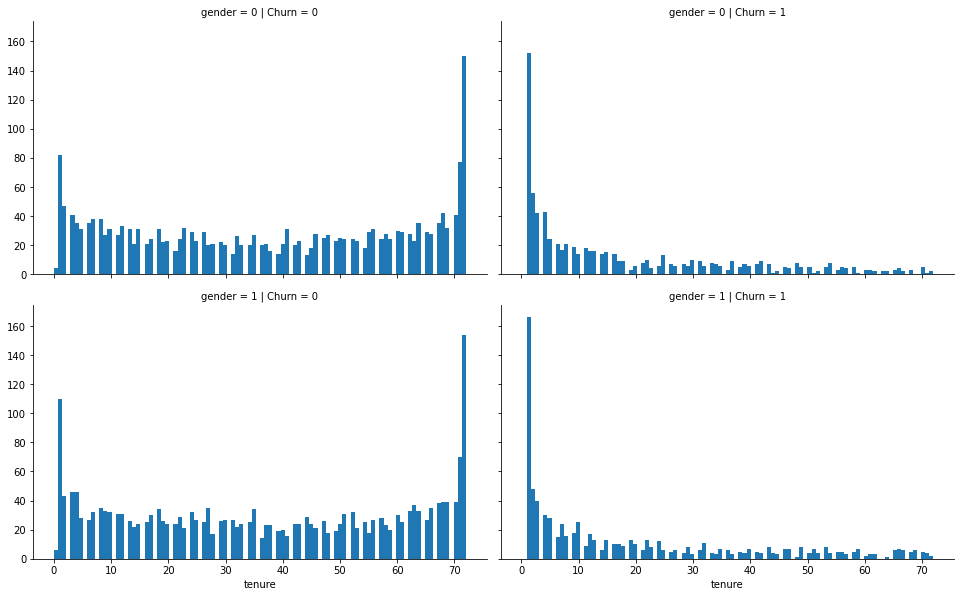

In [25]:
### График количества абонентов от времени пользования услугами компании для действующих и ушедших клиентов
grid = sns.FacetGrid(telecom_df, col='Churn', row='gender', height=4.2, aspect=1.6)
grid.map(plt.hist, 'tenure', bins=100)
grid.add_legend()
plt.show()

На полученных графиках мы хорошо видим, что наибольшее число абонентов уходят в первые 20 месяцев пользования услугами, затем отток выравнивается. Как мы и предполагали ранее, данные так же не зависят от пола абонента. 

Мы можем сделать вывод, что данные о том, сколько месяцев человек пользовался услугами компании, являются важными для построения наших будущих моделей.

### 3) Анализ зависимости оттока от ежемесячной и общей платы, а так же от способа оплаты

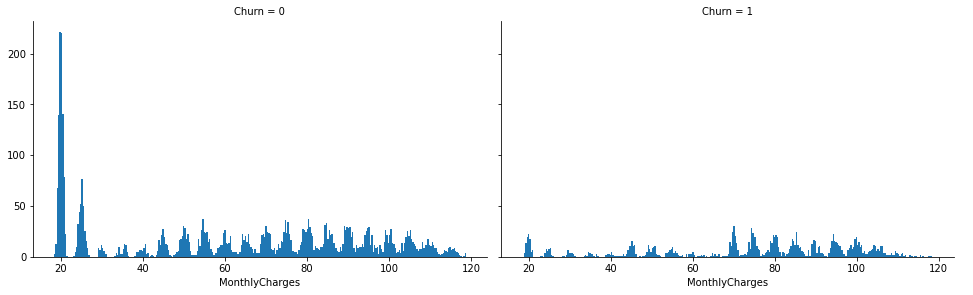

In [26]:
### График количества абонентов в зависимости от ежемесячной платы для действующих и ушедших клиентов
grid = sns.FacetGrid(telecom_df, col='Churn', height=4.2, aspect=1.6)
grid.map(plt.hist, 'MonthlyCharges', bins=300)
grid.add_legend()
plt.show()

На полученных графиках виден скачок оттока среди пользователей, у которых абонентская плата превышает 70 долларов в месяц, что является важным признаком для построения будущих моделей прогнозирования. 

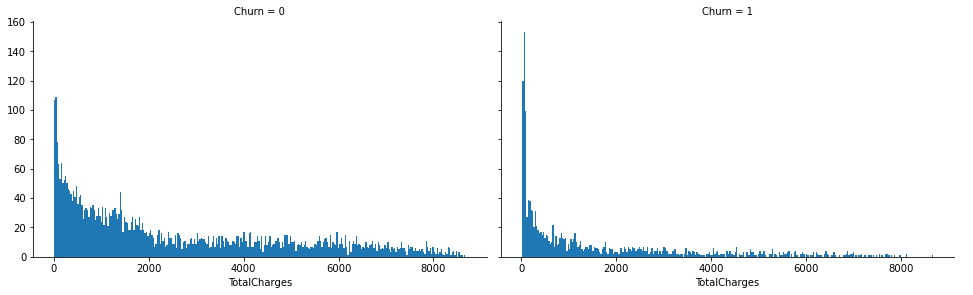

In [27]:
### График количества абонентов в зависимости от общей платы за все время для действующих и ушедших клиентов
grid = sns.FacetGrid(telecom_df, col='Churn', height=4.2, aspect=1.6)
grid.map(plt.hist, 'TotalCharges', bins=300)
grid.add_legend()
plt.show()

Полученные графики похожи на первый график - количества абонентов от времени пользования услугами компании. Таким образом видно, что наибольшее количество клиентов уходят до того, как сумма платы за все время превысит 1000 долларов.


In [28]:
### Количество ушедших абонентов (группировка по способу оплаты)
count = telecom_df[['PaymentMethod', 'Churn']].groupby(['PaymentMethod']
                                         ).sum().sort_values(by='Churn')
print(telecom_df['PaymentMethod'].value_counts(normalize=True))

count

2    0.335115
3    0.228700
1    0.218510
0    0.217675
Name: PaymentMethod, dtype: float64


,Churn
PaymentMethod,
0,198
1,224
3,263
2,902


PaymentMethod
* Credit card (automatic) = 0
* Bank transfer (automatic) = 1
* Electronic check = 2
* Mailed check = 3

Анализируя данные по способам оплаты, можно сделать следующие выводы:
* Пополнение с кредитной карты, банковский перевод и отправка чека почтой составляют каждый порядка 22%, в то время как наибольшее количество пользователей производит оплату электронным чеком;
* Что касается оттока, то здесь первые 3 способа так же занимают практически равные позиции в 15-16% от общего числа ушедших пользователей. В то же время количество ушедших абонентов, производящих оплату электронным чеком, состаляет почти 57%. 

### 4) Анализ зависимости оттока от подключенных дополнительных сервисов

In [29]:
### Количество ушедших абонентов (группировка по наличию подключения к телефонии)
count = telecom_df[['PhoneService', 'Churn']].groupby(['PhoneService']
                                         ).sum().sort_values(by='Churn')

print(telecom_df['PhoneService'].value_counts(normalize=True))

count

1    0.901437
0    0.098563
Name: PhoneService, dtype: float64


,Churn
PhoneService,
0,149
1,1438


Количество абонентов, не использующих услуги связи составляет 10%. Примерно столько же их среди оттока клиентов. 

In [30]:
### Количество ушедших абонентов (группировка по услугам интернета)
count = telecom_df[['InternetService', 'Churn']].groupby(['InternetService']
                                         ).sum().sort_values(by='Churn')

count

,Churn
InternetService,
0,99
1,397
2,1091


In [31]:
### Рассмотрим процентное соотношение для разных видов интернет-сервисов
print(telecom_df['InternetService'].value_counts(normalize=True))
print(telecom_df['OnlineSecurity'].value_counts(normalize=True))
print(telecom_df['OnlineBackup'].value_counts(normalize=True))
print(telecom_df['DeviceProtection'].value_counts(normalize=True))
print(telecom_df['TechSupport'].value_counts(normalize=True))
print(telecom_df['StreamingTV'].value_counts(normalize=True))
print(telecom_df['StreamingMovies'].value_counts(normalize=True))

2    0.438857
1    0.345473
0    0.215670
Name: InternetService, dtype: float64
0    0.713832
1    0.286168
Name: OnlineSecurity, dtype: float64
0    0.650852
1    0.349148
Name: OnlineBackup, dtype: float64
0    0.656699
1    0.343301
Name: DeviceProtection, dtype: float64
0    0.710157
1    0.289843
Name: TechSupport, dtype: float64
0    0.614768
1    0.385232
Name: StreamingTV, dtype: float64
0    0.609255
1    0.390745
Name: StreamingMovies, dtype: float64


In [32]:
### Процентное соотношение для ушедших людей в зависимости от длительности контракта

count = telecom_df[['Contract', 'Churn']].groupby(['Contract']
                                         ).sum().sort_values(by='Churn')

print(telecom_df['Contract'].value_counts(normalize=True))
count

0    0.546108
2    0.240728
1    0.213164
Name: Contract, dtype: float64


,Churn
Contract,
2,41
1,148
0,1398


Как можно заметить, примерно половина всех абонентов продлевает контракт каждый месяц, примерно 21% имеет годовой контракт и 24% двухгодичный. При этом подавляющее большинство ушедших среди абонентов с месячным контрактом.

In [33]:
count = telecom_df[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling']
                                         ).sum().sort_values(by='Churn')

print(telecom_df['PaperlessBilling'].value_counts(normalize=True))
count

1    0.589375
0    0.410625
Name: PaperlessBilling, dtype: float64


,Churn
PaperlessBilling,
0,406
1,1181


Пока что нет возможности точно ответить на вопрос, какие из параметров будут влиять на построение моделей машинного обучения, поэтому предлагается рассмотреть ряд гипотез. 
1) На первом этапе построить модели для стандартного датасета без каких либо преобразований.

2) Объединить количество всех подключенных интернет-сервисов для каждого абонента в отдельный столбец  "Internet_sum"

3) Так же объединить все признаки, относящиеся к личной жизни в отдельный столбец "Gender_sum"

In [34]:
telecom_df['Gender_sum'] = telecom_df['SeniorCitizen'] + telecom_df['Partner'] + telecom_df['Dependents']

In [35]:
telecom_df['Internet_sum'] = telecom_df['OnlineSecurity'] + telecom_df['OnlineBackup'
                        ] + telecom_df['TechSupport'] + telecom_df['StreamingTV'
                        ] + + telecom_df['StreamingMovies'] + telecom_df['DeviceProtection']

In [36]:
telecom_df_1 = telecom_df.drop(['Gender_sum', 'Internet_sum'], 1)

In [37]:
telecom_df_2 = telecom_df.drop(["SeniorCitizen", "Partner", "Dependents"], 1)

In [38]:
telecom_df_3 = telecom_df.drop(['OnlineSecurity', 'OnlineBackup'
                        , 'TechSupport', 'StreamingTV'
                        , 'StreamingMovies', 'DeviceProtection'], 1)

In [39]:
telecom_df_4 = telecom_df.drop(['OnlineSecurity', 'OnlineBackup'
                        , 'TechSupport', 'StreamingTV'
                        , 'StreamingMovies', 'DeviceProtection',
                               "SeniorCitizen", "Partner", "Dependents",
                               'Gender_sum', 'Internet_sum'], 1)

# 3. Построение моделей для прогнозирования оттока

Теперь мы можем перейти к построению моделей. Для наших целей будем использовать следующий набор методов:
* Метод ближайших соседей
* Баесовский классификатор
* Дерево решений
* Логистическую регрессию
* Support Vector Machines
* Stochastic Gradient Descent

Для метода оценки на первом этапе будем использовать classification_report, который вычисляет метрики precision, recall и f1-score, а так же визуализировать матрицу ошибок. Нашей основной целью является повышение метрики recall. То есть нам важно, что бы алгоритм как можно лучше определял людей, которые отказываются от пользования услугами.

Для наших вычислений примем random_state для всех вычислений равную 17. На первом этапе выполним предсказания на полном датасете без каких-либо преобразований.


In [40]:
telecom_df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,2,0,0,24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,0,88.15,3973.20,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,1,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,2,53.45,119.50,0


In [41]:
### Разделяем датасет на признаки и целевую переменную
feauters = telecom_df_1.drop("Churn", 1)
labels = telecom_df_1["Churn"]

print(labels.shape)
print(feauters.shape)


(5986,)
(5986, 19)


In [42]:
### Разбиваем выборку на тренировочный и тестовый датасет
X_train, X_test, y_train, y_test = train_test_split(feauters, labels, test_size=0.20, random_state = 17) 

In [44]:
### Метод ближайших соседей

from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

conf_mtrx = confusion_matrix(y_test, knn_predictions)
report = classification_report(y_test, knn_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       883
           1       0.60      0.44      0.51       315

    accuracy                           0.77      1198
   macro avg       0.71      0.67      0.68      1198
weighted avg       0.76      0.77      0.76      1198

[[790  93]
 [177 138]]
0.6663862373941649


In [45]:
### Баесовский классификатор

nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)

conf_mtrx = confusion_matrix(y_test, nb_predictions)
report = classification_report(y_test, nb_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       883
           1       0.52      0.69      0.60       315

    accuracy                           0.75      1198
   macro avg       0.70      0.73      0.71      1198
weighted avg       0.78      0.75      0.76      1198

[[684 199]
 [ 97 218]]
0.7333477143216668


In [46]:
### Дерево решений

dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
dtc_predictions = dtc.predict(X_test)

conf_mtrx = confusion_matrix(y_test, dtc_predictions)
report = classification_report(y_test, dtc_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       883
           1       0.45      0.49      0.47       315

    accuracy                           0.71      1198
   macro avg       0.63      0.64      0.64      1198
weighted avg       0.72      0.71      0.71      1198

[[698 185]
 [161 154]]
0.6396879325531648


In [47]:
###LogisticRegression

lr_bin = LogisticRegression(solver="lbfgs", random_state=17, max_iter=1000)
lr_bin_model = lr_bin.fit(X_train, y_train)
lr_bin_prediction = lr_bin_model.predict(X_test)

conf_mtrx = confusion_matrix(y_test, lr_bin_prediction)
report = classification_report(y_test, lr_bin_prediction)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, lr_bin_prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       883
           1       0.66      0.55      0.60       315

    accuracy                           0.81      1198
   macro avg       0.75      0.72      0.73      1198
weighted avg       0.80      0.81      0.80      1198

[[794  89]
 [143 172]]
0.722619497024933


In [48]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd_model = sgd.fit(X_train, y_train)
sgd_prediction = sgd.predict(X_test)

conf_mtrx = confusion_matrix(y_test, sgd_prediction)
report = classification_report(y_test, sgd_prediction)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, sgd_prediction))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87       883
           1       0.71      0.30      0.43       315

    accuracy                           0.78      1198
   macro avg       0.75      0.63      0.65      1198
weighted avg       0.77      0.78      0.75      1198

[[843  40]
 [219  96]]
0.6297308957558108


In [49]:
### Support Vector Machines

from sklearn.svm import SVC

svc = SVC()
svc_model = svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

conf_mtrx = confusion_matrix(y_test, svc_prediction)
report = classification_report(y_test, svc_prediction)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       883
           1       0.00      0.00      0.00       315

    accuracy                           0.74      1198
   macro avg       0.37      0.50      0.42      1198
weighted avg       0.54      0.74      0.63      1198

[[883   0]
 [315   0]]
0.5


/Users/vadimchibisov/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vadimchibisov/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vadimchibisov/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Для полного датасета без преобразований и настройки гиперпараметров, Баесовский классификатор и LogisticRegression показывают наилучшие результаты в отношении метрики roc_auc. При этом Баесовский классификатор показывает наилучшии показатели метрики recall для определения абонентов, которые могут уйти. Попробуем использовать некоторые наши модели, настроив гитперпараметры.

1) Для "Метода ближайших соседей" применим подбор наилучшего гиперпараметра n, при котором получим наилучший recall и auc

In [50]:
### Для нашей модели найдем гиперпараметр n_neighbors, при котором получим наибольший recall

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    recall = recall_score(y_test, knn_predictions)
    auc = roc_auc_score(y_test, knn_predictions)
    print(i, "recall - ", recall)
    print(i, "auc - ", auc)
    print("________________")

1 recall -  0.5238095238095238
1 auc -  0.6662082726635388
________________
2 recall -  0.2634920634920635
2 auc -  0.6073972208740046
________________
3 recall -  0.47619047619047616
3 auc -  0.6758075823760988
________________
4 recall -  0.326984126984127
4 auc -  0.6329144870481225
________________
5 recall -  0.4380952380952381
5 auc -  0.6663862373941649
________________
6 recall -  0.37777777777777777
6 auc -  0.6549138039511765
________________
7 recall -  0.44126984126984126
7 auc -  0.6719372988908663
________________
8 recall -  0.38095238095238093
8 auc -  0.6565011055384782
________________
9 recall -  0.4222222222222222
9 auc -  0.6624134893670569
________________
10 recall -  0.3492063492063492
10 auc -  0.6377968325873196
________________
11 recall -  0.39365079365079364
11 auc -  0.6509590321594851
________________
12 recall -  0.34285714285714286
12 auc -  0.6391522407377448
________________
13 recall -  0.38412698412698415
13 auc -  0.6524258929694943
_______________

In [51]:
### Для нашего датасета наилучший параметр n = 1. Обучим нашу модель с учетом этого параметра

knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

conf_mtrx = confusion_matrix(y_test, knn_predictions)
report = classification_report(y_test, knn_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       883
           1       0.49      0.52      0.51       315

    accuracy                           0.73      1198
   macro avg       0.66      0.67      0.66      1198
weighted avg       0.74      0.73      0.74      1198

[[714 169]
 [150 165]]
0.6662082726635388


С настройкой гиперпараметра n, наилучший результат по метрике roc_auc не превышает 0.67

2) Следующую модель построим с заданными гиперпараметрами для Дерева решений

In [52]:
### Зададим гиперпараметры для модели Decision Trees
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1, 10), 
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(dtc, tree_params, cv=5)

In [53]:
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

{'max_depth': 5, 'max_features': 6}

In [54]:
### Обучение модели с наилучшими параметрами
dtc_model = tree_grid.fit(X_train, y_train)
dtc_predictions = tree_grid.predict(X_test)

conf_mtrx = confusion_matrix(y_test, dtc_predictions)
report = classification_report(y_test, dtc_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       883
           1       0.65      0.45      0.53       315

    accuracy                           0.79      1198
   macro avg       0.74      0.68      0.70      1198
weighted avg       0.78      0.79      0.78      1198

[[805  78]
 [172 143]]
0.6828165165651009


Модель, обученная с учетом подбора наилучших параметров, показывает значительное увеличение метрики auc_score. 

3) Построим логистическую регрессию с параметрами кросс-валидации

In [55]:
### Зададим параметры для кросс-валидации
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
Cs_list = np.logspace(-1, 2, num = 500)

In [56]:
LogRegCV = LogisticRegressionCV(Cs=Cs_list, max_iter = 500
    ,scoring='roc_auc'
    ,cv=fold
    ,random_state=17
)

lr = LogRegCV.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

conf_mtrx = confusion_matrix(y_test, lr_predictions)
report = classification_report(y_test, lr_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, lr_predictions))

print(LogRegCV.scores_[1].shape)
print('Max auc_roc:', LogRegCV.scores_[1].max())

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       883
           1       0.66      0.53      0.59       315

    accuracy                           0.81      1198
   macro avg       0.75      0.72      0.73      1198
weighted avg       0.80      0.81      0.80      1198

[[797  86]
 [147 168]]
0.7179690449226123
(5, 500)
Max auc_roc: 0.8507801211903988


Проверим качество для лучших моделей на преобразованных датасетах telecom_df_2 и telecom_df_3

In [ ]:
feauters2 = telecom_df_2.drop("Churn", 1)
labels2 = telecom_df_2["Churn"]

print(labels2.shape)
print(feauters2.shape)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(feauters2, labels2, test_size=0.20, random_state = 17) 

In [ ]:
lr_bin = LogisticRegression(solver="lbfgs", random_state=17, max_iter=1000)
lr_bin_model = lr_bin.fit(X_train2, y_train2)
lr_bin_prediction = lr_bin_model.predict(X_test2)

conf_mtrx = confusion_matrix(y_test2, lr_bin_prediction)
report = classification_report(y_test2, lr_bin_prediction)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test2, lr_bin_prediction))

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train2, y_train2)
nb_predictions = nb.predict(X_test2)

conf_mtrx = confusion_matrix(y_test2, nb_predictions)
report = classification_report(y_test2, nb_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test2, nb_predictions))

In [ ]:
feauters3 = telecom_df_3.drop("Churn", 1)
labels3 = telecom_df_3["Churn"]

print(labels3.shape)
print(feauters3.shape)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(feauters3, labels3, test_size=0.20, random_state = 17) 

In [ ]:
lr_bin = LogisticRegression(solver="lbfgs", random_state=17, max_iter=1000)
lr_bin_model = lr_bin.fit(X_train3, y_train3)
lr_bin_prediction = lr_bin_model.predict(X_test3)

conf_mtrx = confusion_matrix(y_test3, lr_bin_prediction)
report = classification_report(y_test3, lr_bin_prediction)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test3, lr_bin_prediction))

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train3, y_train3)
nb_predictions = nb.predict(X_test3)

conf_mtrx = confusion_matrix(y_test3, nb_predictions)
report = classification_report(y_test3, nb_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test3, nb_predictions))

In [ ]:
dtc_model = tree_grid.fit(X_train, y_train)
dtc_predictions = tree_grid.predict(X_test)

conf_mtrx = confusion_matrix(y_test, dtc_predictions)
report = classification_report(y_test, dtc_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test, dtc_predictions))

In [ ]:
feauters4 = telecom_df_4.drop("Churn", 1)
labels4 = telecom_df_4["Churn"]

print(labels4.shape)
print(feauters4.shape)

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(feauters4, labels4, test_size=0.20, random_state = 17) 

In [ ]:
lr_bin = LogisticRegression(solver="lbfgs", random_state=17, max_iter=1000)
lr_bin_model = lr_bin.fit(X_train4, y_train4)
lr_bin_prediction = lr_bin_model.predict(X_test4)

conf_mtrx = confusion_matrix(y_test4, lr_bin_prediction)
report = classification_report(y_test4, lr_bin_prediction)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test4, lr_bin_prediction))

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train4, y_train4)
nb_predictions = nb.predict(X_test4)

conf_mtrx = confusion_matrix(y_test4, nb_predictions)
report = classification_report(y_test4, nb_predictions)
print(report)
print(conf_mtrx)
print(roc_auc_score(y_test4, nb_predictions))

Как можно заметить, по сравнению с моделями для полного датасета, качество обучения на преобразованных датасетах незначительно улучшается для "Баесовского классификатора".

# 4. Сравнение качества моделей 

Сравнение качества лучших моделей используя метрику auc_roc и вероятность распределения predict_proba

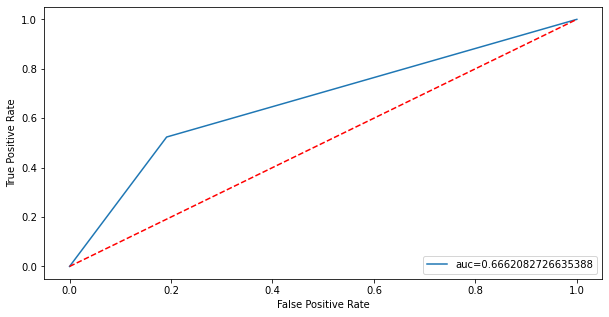

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve

### Метод ближайших соседей

probas = knn.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

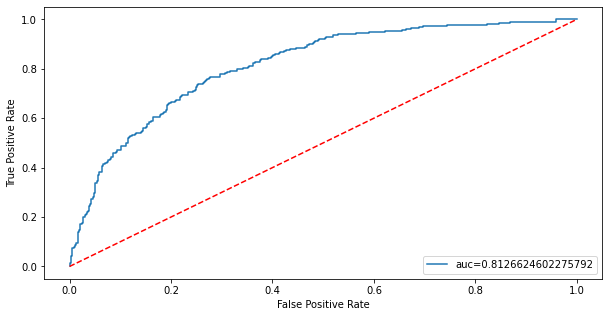

In [58]:
### Баесовский классификатор

probas = nb.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

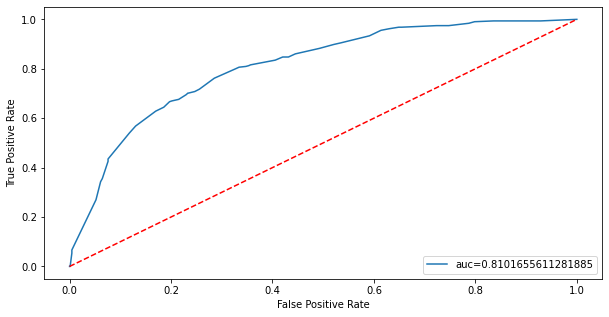

In [59]:
### Дерево решений


probas = tree_grid.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

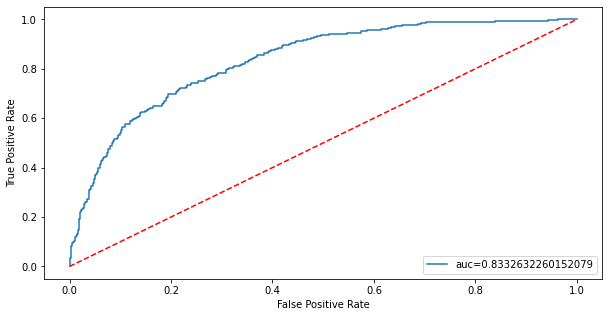

In [60]:
### Логистическая регрессия


probas = lr_bin.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

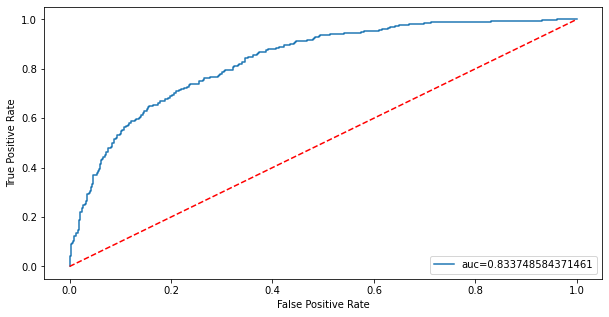

In [61]:
probas = LogRegCV.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Из полученных методов оценки мы видим, что наилучшим показателем auc обладает модель логистической регрессии. 

Попробуем улучшить результаты модели, используя алгоритм сэмплинга SMOTE. То есть имея несбалансированную выборку, синтетически увеличим количество ушедших абонентов. Что бы не допустить попадания тестовых данных, построим модель over-sampling исключительно на тренировочных данных.

In [77]:
### Построение модели over-sampling на основе алгоритма SMOTE

X = telecom_df_1.loc[:, telecom_df_1.columns != 'Churn']
y = telecom_df_1.loc[:, telecom_df_1.columns == 'Churn']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

print("Величина датасета ",len(os_data_X))
print("Количество оставшихся абонентов",len(os_data_y[os_data_y['Churn']==0]))
print("Количество ушедших абонентов",len(os_data_y[os_data_y['Churn']==1]))


Величина датасета  7032
Количество оставшихся абонентов 3516
Количество ушедших абонентов 3516


In [92]:
### Обучение модифицированной модели

X = os_data_X
y = os_data_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [95]:
### Построение classification_report

lr_predictions = logreg.predict(X_test)
report = classification_report(y_test, lr_predictions)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       703
           1       0.83      0.87      0.85       704

    accuracy                           0.84      1407
   macro avg       0.84      0.84      0.84      1407
weighted avg       0.84      0.84      0.84      1407



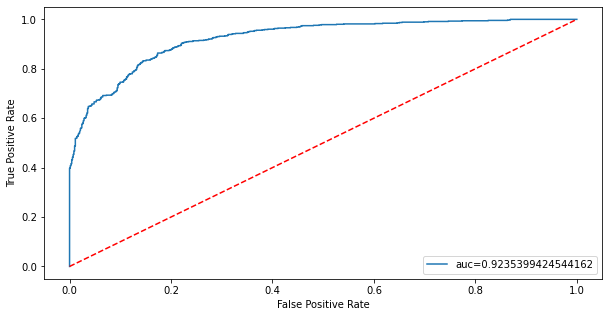

In [90]:
probas = logreg.fit(X_train, y_train.values.ravel()).predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:, 1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print

### Выводы:
После окончательных преобразований, использовав для тренировочных данных алгоритм сэмплинга SMOTE и используя метрику оценки auc_roc с вероятностью распределения predict_proba, мы получили точность нашей модели auc=0.92.
При этом метрика recall для предсказания потенциальных абонентов, которые могут уйти, составляет 0.87. 